# Introduction
This Notebook teach how to apply linear regression if we have more than 1 feature. 
* **Features**
    - X1 = Years of Experience 
    - X2 = Education Leavel Score
* **Label**
    - Salary

In [1]:


import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 1. Data Preparation
# X1 = Years of Experience, X2 = Education Level Score
# y = Salary (in thousands of $)
X_numpy = np.array([
    [1, 1],
    [2, 1],
    [3, 2],
    [4, 1],
    [5, 2],
    [6, 3],
    [2, 2],
    [4, 3]], dtype=np.float32)

y_numpy = np.array([35, 45, 60, 65, 80, 95, 55, 85], dtype=np.float32)

In [3]:
# Convert NumPy arrays to PyTorch tensors
# X will now have 2 columns (features)
X = torch.from_numpy(X_numpy)
y = torch.from_numpy(y_numpy.reshape(-1, 1))

In [4]:
# 2. Define the Model
# Our linear regression model is very simple: it has one linear layer.
# Input and Output layer WE can programm this
# y = m1*x1 + m2*x2 + c  is a linear transformation.

class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        out = self.linear(x)
        return out

In [5]:
# Instantiate the model
# input_dim is now the number of features in X_numpy, which is X_numpy.shape[1]
# output_dim = 1 (we want to predict one value: Salary)

input_dim = X_numpy.shape[1]
output_dim = 1
model = LinearRegressionModel(input_dim, output_dim)

In [6]:
# 3. Define Loss Function and Optimizer
# Loss Function: This measures how bad our model's predictions are compared to the actual values.
# For regression, Mean Squared Error (MSE) is common. It calculates the average of the squared differences
# between predicted and actual values. Squaring ensures errors are positive and penalizes larger errors more.

criterion = nn.MSELoss()

# Optimizer: This is the algorithm that adjusts the model's parameters (m and c) to minimize the loss.
# Stochastic Gradient Descent (SGD) is a popular choice.
# 'model.parameters()' tells the optimizer which values it needs to adjust.
# 'lr' is the learning rate: it controls how big the adjustment steps are.
# A small learning rate means slower but potentially more precise learning.
# A large learning rate might overshoot the optimal values.

learning_rate = 0.01 # You might need to tune this for different datasets/models
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [7]:
# 4. Training the Model
# Training involves feeding the data to the model multiple times (epochs)
# and updating the weights (m and c) in each iteration to reduce the loss.
# num_epoch is How many times we go through the entire dataset

num_epochs = 3000

for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X)

    # Calculate loss
    loss = criterion(outputs, y)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 300 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [300/3000], Loss: 10.8664
Epoch [600/3000], Loss: 6.8271
Epoch [900/3000], Loss: 5.9385
Epoch [1200/3000], Loss: 5.7304
Epoch [1500/3000], Loss: 5.6816
Epoch [1800/3000], Loss: 5.6702
Epoch [2100/3000], Loss: 5.6675
Epoch [2400/3000], Loss: 5.6669
Epoch [2700/3000], Loss: 5.6667
Epoch [3000/3000], Loss: 5.6667


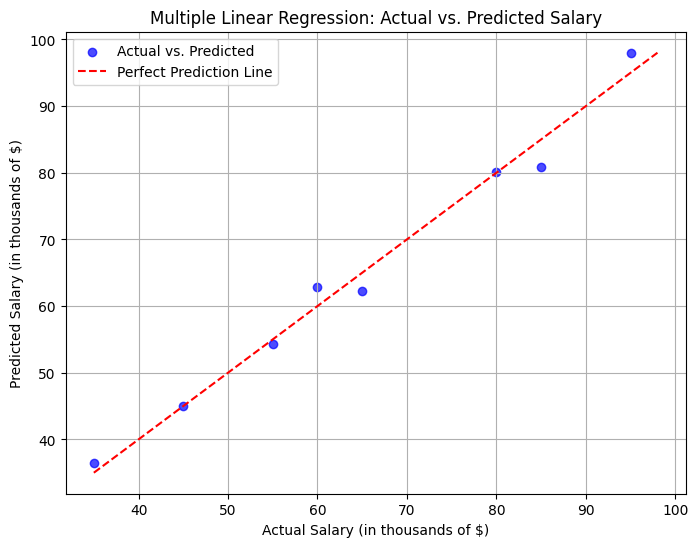

In [8]:
# 5. Evaluating the Model and Plotting
# After training, our model has learned (hopefully good) values for 'm' and 'c'.
# Put the model in evaluation mode (this is good practice, though for a simple linear model

model.eval()
with torch.no_grad():
    predicted = model(X).detach().numpy()

# Plotting for multiple linear regression is a bit different.
# We can't easily plot a line on a 2D graph with 2 input features directly against y.
# A common practice is to plot actual vs. predicted values.
# If they fall close to a diagonal line, it indicates good predictions.

plt.figure(figsize=(8, 6))
plt.scatter(y_numpy, predicted, color='blue', alpha=0.7, label='Actual vs. Predicted')
# Add a diagonal line for reference (perfect prediction line y=x)
min_val = min(np.min(y_numpy), np.min(predicted))
max_val = max(np.max(y_numpy), np.max(predicted))
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Perfect Prediction Line')
plt.title('Multiple Linear Regression: Actual vs. Predicted Salary')
plt.xlabel('Actual Salary (in thousands of $)')
plt.ylabel('Predicted Salary (in thousands of $)')
plt.legend()
plt.grid(True)
plt.show()

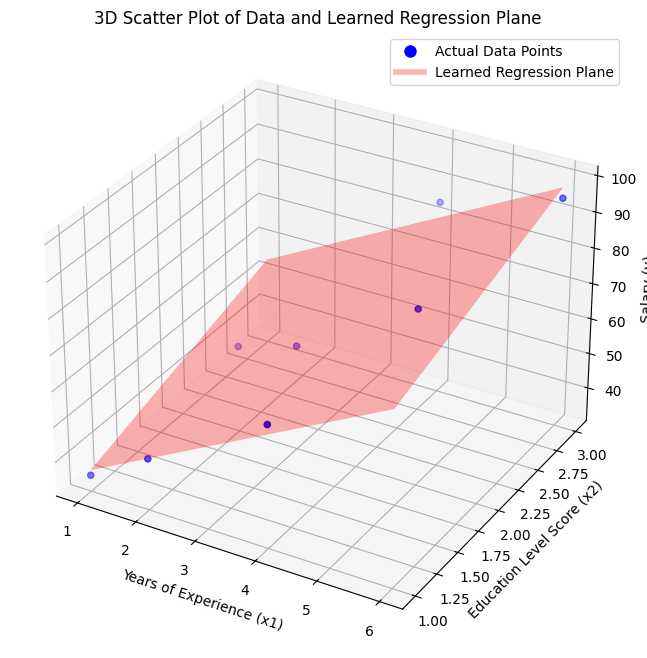

In [9]:
# For 2 input features, we can also try a 3D scatter plot of the data
# and potentially the plane (though plotting the plane is more complex).
# Here's how you might plot the original data in 3D:

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_numpy[:, 0], X_numpy[:, 1], y_numpy, color='blue', label='Actual Data Points')
# To plot the learned plane:
# Create a meshgrid for X1 and X2
x1_surf, x2_surf = np.meshgrid(np.linspace(X_numpy[:, 0].min(), X_numpy[:, 0].max(), 20),
                               np.linspace(X_numpy[:, 1].min(), X_numpy[:, 1].max(), 20))
# Use the model to predict Z values for the meshgrid
x_surf_flat = np.c_[x1_surf.ravel(), x2_surf.ravel()]
z_surf = model(torch.from_numpy(x_surf_flat).float()).detach().numpy().reshape(x1_surf.shape)
ax.plot_surface(x1_surf, x2_surf, z_surf, color='red', alpha=0.3, label='Learned Regression Plane')

# Adding a phantom artist for the legend of the surface plot
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Actual Data Points',
                          markerfacecolor='blue', markersize=10),
                   Line2D([0], [0], color='red', lw=4, label='Learned Regression Plane', alpha=0.3)]


ax.set_xlabel('Years of Experience (x1)')
ax.set_ylabel('Education Level Score (x2)')
ax.set_zlabel('Salary (y)')
ax.set_title('3D Scatter Plot of Data and Learned Regression Plane')
ax.legend(handles=legend_elements)
plt.show()

In [10]:
# 6. Inspecting the Learned Parameters
# model.linear.weight will now contain two weights (m1, m2)
# model.linear.bias will still contain one bias (c)
learned_weights = model.linear.weight.data.numpy().flatten() # Use .data to get tensor data
learned_bias = model.linear.bias.data.numpy()[0]

print(f"\nPyTorch Learned Parameters:")
print(f"Weights (m1, m2, ...): {learned_weights}")
for i, weight in enumerate(learned_weights):
    print(f"  Weight for feature x{i+1} (m{i+1}): {weight:.4f}")
print(f"Y-intercept (c): {learned_bias:.4f}")

print(f"\nEquation of the line from PyTorch:")
equation_parts = [f"{learned_weights[i]:.2f} * x{i+1}" for i in range(len(learned_weights))]
print(f"Salary = {' + '.join(equation_parts)} + {learned_bias:.2f}")




PyTorch Learned Parameters:
Weights (m1, m2, ...): [8.600311 9.27019 ]
  Weight for feature x1 (m1): 8.6003
  Weight for feature x2 (m2): 9.2702
Y-intercept (c): 18.5913

Equation of the line from PyTorch:
Salary = 8.60 * x1 + 9.27 * x2 + 18.59
